Fishers exact p value =  0.12313841647605986
Chi_Squared exact p value =  0.1422964809147197


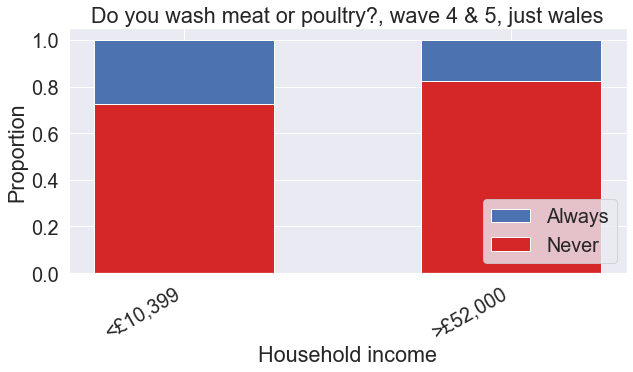

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 13 22:24:03 2020

@author: charliejeynes

chi-squared test adapted from https://codingdisciple.com/chi-squared-python.html

Fishers exact test adapted from 
https://towardsdatascience.com/fishers-exact-test-from-scratch-with-python-2b907f29e593
https://scientificallysound.org/2018/07/05/what-is-an-exact-test-an-example-using-fishers-exact-test/

"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.matlib as matlib 
import math as math
import statsmodels.stats.proportion as smp
import scipy.stats as stats
sns.set(style="ticks")  


# import data
df = pd.read_csv('/Users/charliejeynes/Documents/Pivago local documents/data/food survey/Food+and+You+Waves+1-5+Data (3).csv')

#select the columns and values of interest in in the dataframe. hhdinc = house hold income
# select only wales
# select only 'always' and 'never' answers grouped by hhinc
df_temp = df[  (df['region_dv'] == 10) 
                  & (df['surveyyear'].isin([4,5]))
                  & (df['country_dv'] == 2)
                  & (df['Q4_1_5_comb'].isin([1,4])) 
                  & (df['hhdinc'].isin([1,2,3,4]))                  
                  ] 

# make a 2x2 Fisher contingency table 
def mk_2by2_contingency(df, row, column, norm=False):
    '''
    the point of this is to be able to normalise the contingency table so as to 
    plot out bar charts. It also always makes a 2x2 table from (shape(3,5) size input table 
    to make compatible with Fisher test
    makes a contingency table from a df, with False. 'column' or ''row' 
    to normalise it or not. 
    It then makes it 2x2 by taking the first and last but one column of the contingency table
    '''
    contingency_table = pd.crosstab(
                            df[row],
                            df[column],
                            margins = True,
                            normalize = norm
                        )  
    if contingency_table.shape == (3,5):
        return contingency_table.iloc[0:-1, [0,-2]].to_numpy() # reminder to self .iloc is (rows, columns)
    else: 
        return contingency_table.iloc[0:, [0,-2]].to_numpy()
    
contingency_table =  mk_2by2_contingency(df_temp, 'Q4_1_5_comb', 'hhdinc')
contingency_table = contingency_table
oddsratio, pvalue = stats.fisher_exact([contingency_table[0], contingency_table[1]])  
print('Fishers exact p value = ',  pvalue)
chi, p_chi, dof = stats.chi2_contingency([contingency_table[0], contingency_table[1]], True)[0:3]
print('Chi_Squared exact p value = ',  p_chi)

#make a proportions contingency table
contingency_table =  mk_2by2_contingency(df_temp, 'Q4_1_5_comb', 'hhdinc', 'columns')


#Plots the bar chart
never_count = contingency_table[0]
always_count = contingency_table[1]
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["<£10,399",">£52,000"]
p1 = plt.bar(categories, never_count, 0.55, color='#d62728')
p2 = plt.bar(categories, always_count, 0.55, bottom=never_count)
plt.legend((p2[0], p1[0]), ('Always', 'Never'), loc='lower right')
plt.xlabel('Household income')
plt.ylabel('Proportion')
plt.title('Do you wash meat or poultry?, wave 4 & 5, just wales')
fig.autofmt_xdate()
plt.show()










